In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization, Bidirectional
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import re
import datetime
import math
import talib


In [66]:
data= pd.read_csv('india.csv',parse_dates=['Date'])


In [67]:
data.set_index('Date',inplace=True)

In [68]:
for data in [data]:
  for col in data.columns:
    data[col] = data[col].apply(lambda x: re.sub(r'[^0-9.]+','',x))

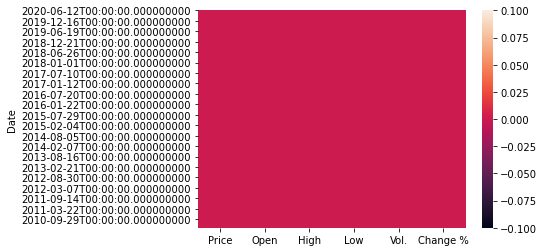

In [69]:
sns.heatmap(data.isnull())

In [70]:
data = data.iloc[::-1]

In [71]:
data

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2010-05-13,5178.90,5157.55,5212.70,5147.95,179.38,0.43
2010-05-14,5093.50,5180.55,5192.75,5070.95,144.38,1.65
2010-05-17,5059.90,5093.90,5094.55,4966.25,169.31,0.66
2010-05-18,5066.20,5059.55,5105.20,5024.25,137.03,0.12
2010-05-19,4919.65,5065.10,5065.10,4908.15,212.95,2.89
...,...,...,...,...,...,...
2020-06-08,10167.45,10326.75,10328.50,10120.25,936.49,0.25
2020-06-09,10046.65,10181.15,10291.15,10021.45,754.22,1.19
2020-06-10,10116.15,10072.60,10148.75,10036.85,632.38,0.69


In [72]:
close = np.array(data['Price']).astype(float)
high =np.array(data['High']).astype(float)
low =np.array(data['Low']).astype(float)

In [73]:
EMA= talib.MA(close,timeperiod=9 , matype= talib.MA_Type.EMA)
data['EMA'] = EMA

In [74]:
WR= talib.WILLR(data['High'], data['Low'], data['Price'], timeperiod=9 )
data['WR'] = WR

In [75]:
MA= talib.MA(data['Price'], timeperiod=9 )
data['MA'] = MA

In [76]:
data.dropna(inplace=True)

In [77]:
data = data.drop(['Open','High','Low','Vol.','Change %','EMA','WR','MA'],axis=1)
data

,Price
Date,
2010-05-25,4806.75
2010-05-26,4917.40
2010-05-27,5003.10
2010-05-28,5066.55
2010-05-31,5086.30
...,...
2020-06-08,10167.45
2020-06-09,10046.65
2020-06-10,10116.15


In [91]:
data['Price'].astype(float)

Date
2012-05-09     4974.80
2012-05-10     4965.70
2012-05-11     4928.90
2012-05-14     4907.80
2012-05-15     4942.80
                ...   
2020-06-05    10142.15
2020-06-08    10167.45
2020-06-09    10046.65
2020-06-10    10116.15
2020-06-11     9902.00
Name: Price, Length: 1999, dtype: float64

In [92]:
data = data[-2000:-1]
split_ratio = 0.75
data_training = data.iloc[:int(data.shape[0]*split_ratio)]
data_test = data.iloc[int(data.shape[0]*split_ratio):]
data_training.shape, data_test.shape

((1498, 1), (500, 1))

In [93]:
def standardize(x):
    a=x-x.min()
    b=x.max()-x.min()
    c=-1+2*a/b
    return np.array(c)

In [94]:
data_training

,Price
Date,
2012-05-09,4974.80
2012-05-10,4965.70
2012-05-11,4928.90
2012-05-14,4907.80
2012-05-15,4942.80
...,...
2018-05-21,10516.70
2018-05-22,10536.70
2018-05-23,10430.35


In [95]:
#def split_data(data):
  #X = []
  #y = []

  #for i in range(window, data.shape[0]):
    #X.append(data[i-window:i])
    #y.append(data[i])

#  X = np.array(X)
#  y = np.array(y)
    
#  return X, y

In [96]:
import numpy 

def create_dataset(data, timestep):
    dataX, dataY= [], []
    for i in range(len(data)-timestep-1):
        a= data[i:(i+timestep),0]
        dataX.append(a)
        dataY.append(data[i+timestep,0])
    return numpy.array(dataX), numpy.array(dataY)

In [98]:
#standardize_the_data
training_data= standardize(x=data_training)
#test_data=scalar.transform(data_test)
 

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [53]:
#split the data
timestep=14

X_train,y_train = create_dataset(training_data,timestep)
#X_test,y_test = create_dataset(test_data,timestep)

In [54]:
X_train

array([[0.02210572, 0.02066007, 0.01481393, ..., 0.01362246, 0.0134636 ,
        0.02382938],
       [0.02066007, 0.01481393, 0.01146193, ..., 0.0134636 , 0.02382938,
        0.02453632],
       [0.01481393, 0.01146193, 0.01702212, ..., 0.02382938, 0.02453632,
        0.01828508],
       ...,
       [0.92839271, 0.91863855, 0.93408793, ..., 0.9151674 , 0.90250606,
        0.90568331],
       [0.91863855, 0.93408793, 0.93445331, ..., 0.90250606, 0.90568331,
        0.88878828],
       [0.93408793, 0.93445331, 0.93825013, ..., 0.90568331, 0.88878828,
        0.9020533 ]])

In [55]:
from sklearn import svm 
reg = svm.SVR(C = 1 , kernel = 'rbf', gamma = 'auto')
reg.fit(X_train,y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [56]:
past_days = data_training.tail(timestep)
df = past_days.append(data_test)

In [57]:
df

,Price
Date,
2018-05-09,10741.70
2018-05-10,10716.55
2018-05-11,10806.50
2018-05-14,10806.60
2018-05-15,10801.85
...,...
2020-06-05,10142.15
2020-06-08,10167.45
2020-06-09,10046.65


In [58]:
test_data = scalar.transform(df)

In [59]:
test_data

array([[0.93825013],
       [0.93425474],
       [0.94854442],
       [0.94856031],
       [0.94780571],
       [0.93815481],
       [0.92887724],
       [0.9151674 ],
       [0.90250606],
       [0.90568331],
       [0.88878828],
       [0.9020533 ],
       [0.91655745],
       [0.92982247],
       [0.92102943],
       [0.91801898],
       [0.93736844],
       [0.93102188],
       [0.92026689],
       [0.9146511 ],
       [0.92918702],
       [0.94248382],
       [0.94237261],
       [0.94543866],
       [0.95431908],
       [0.95651932],
       [0.94879066],
       [0.95032368],
       [0.94748799],
       [0.93328567],
       [0.94307161],
       [0.93815481],
       [0.95098296],
       [0.94154653],
       [0.94261091],
       [0.92708209],
       [0.9140077 ],
       [0.9338973 ],
       [0.92484213],
       [0.93160967],
       [0.94273005],
       [0.93952897],
       [0.94316692],
       [0.95591564],
       [0.97090433],
       [0.97107113],
       [0.98296994],
       [0.982

In [60]:
X_test, y_test = create_dataset(test_data,timestep)

In [61]:
X_test

array([[0.93825013, 0.93425474, 0.94854442, ..., 0.9020533 , 0.91655745,
        0.92982247],
       [0.93425474, 0.94854442, 0.94856031, ..., 0.91655745, 0.92982247,
        0.92102943],
       [0.94854442, 0.94856031, 0.94780571, ..., 0.92982247, 0.92102943,
        0.91801898],
       ...,
       [0.63348028, 0.64235275, 0.67213154, ..., 0.83019977, 0.82504468,
        0.84300409],
       [0.64235275, 0.67213154, 0.67843838, ..., 0.82504468, 0.84300409,
        0.84702331],
       [0.67213154, 0.67843838, 0.66779459, ..., 0.84300409, 0.84702331,
        0.82783272]])

In [62]:
y_pred= reg.predict(X_test)
#scale = 1/scalar.scale_[data] 
#y_test, y_pred, y_train = y_test*scale, y_pred*scale, y_train*scale
reg.score(X_test,y_test)

0.47024979744369755

In [65]:
y_test

array([0.92102943, 0.91801898, 0.93736844, 0.93102188, 0.92026689,
       0.9146511 , 0.92918702, 0.94248382, 0.94237261, 0.94543866,
       0.95431908, 0.95651932, 0.94879066, 0.95032368, 0.94748799,
       0.93328567, 0.94307161, 0.93815481, 0.95098296, 0.94154653,
       0.94261091, 0.92708209, 0.9140077 , 0.9338973 , 0.92484213,
       0.93160967, 0.94273005, 0.93952897, 0.94316692, 0.95591564,
       0.97090433, 0.97107113, 0.98296994, 0.98228683, 0.96925215,
       0.98056317, 0.97617856, 0.97246912, 0.98090472, 0.99274792,
       1.00061956, 1.00025418, 1.00586203, 1.02350371, 1.03004885,
       1.03591882, 1.03428254, 1.01815799, 1.03660193, 1.04078002,
       1.04115334, 1.05077247, 1.05406092, 1.04751579, 1.03579967,
       1.04840542, 1.04045435, 1.05406887, 1.06693673, 1.06997895,
       1.07186147, 1.06778665, 1.08920926, 1.09660431, 1.08920132,
       1.08680249, 1.08739029, 1.07179793, 1.06194051, 1.05505381,
       1.06457762, 1.07287025, 1.048882  , 1.02495731, 1.03804

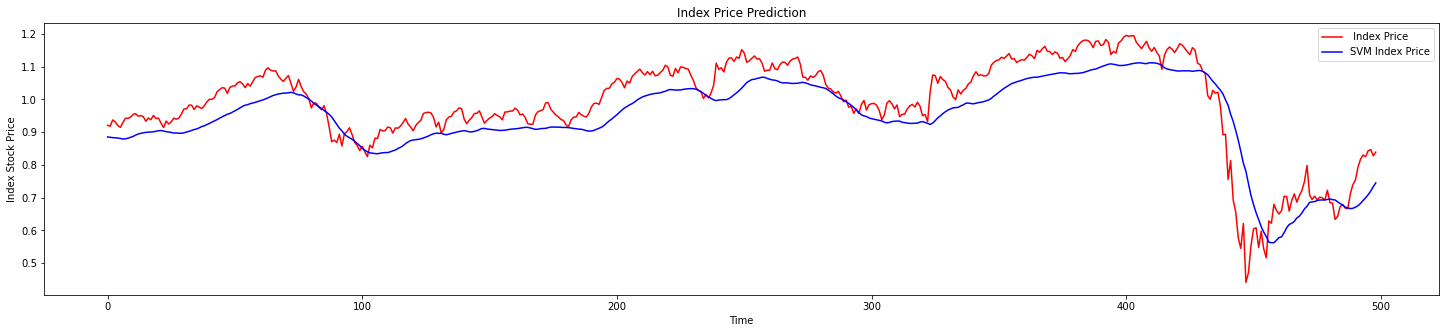

In [35]:
plt.figure(figsize=(25, 5))
plt.plot(y_test, color ='red', label= ' Index Price')
plt.plot(y_pred,  color ='blue', label= 'SVM Index Price')
plt.title('Index Price Prediction')
plt.xlabel('Time')
plt.ylabel('Index Stock Price')
plt.legend()
plt.show()


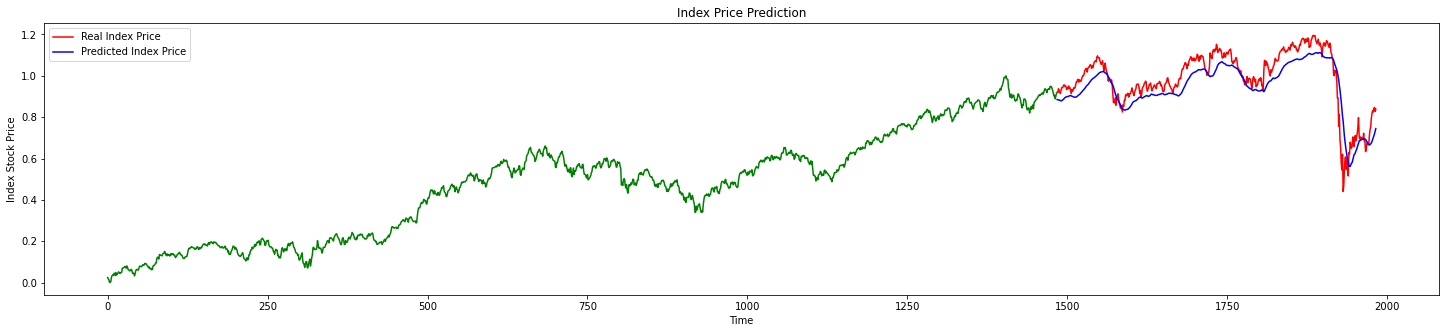

In [36]:
plt.figure(figsize=(25, 5))
plt.plot([x +len(y_train) for x in range(len(y_test))], y_test, color ='red', label= 'Real Index Price')
plt.plot([x +len(y_train) for x in range(len(y_test))], y_pred,  color ='blue', label= 'Predicted Index Price')
plt.plot(range(len(y_train)),y_train,  color ='green')
plt.title('Index Price Prediction')
plt.xlabel('Time')
plt.ylabel('Index Stock Price')
plt.legend()
plt.show()

In [37]:
last_one = data_training.tail(0)
check = last_one.append(data_test)
check.drop(labels = check.index[-1], inplace=True)
check_data = check['Price']
check_data = np.array(check_data).astype(float)

In [38]:
y_test = y_test.reshape((y_test.shape[0], 1))
y_test

array([[0.92102943],
       [0.91801898],
       [0.93736844],
       [0.93102188],
       [0.92026689],
       [0.9146511 ],
       [0.92918702],
       [0.94248382],
       [0.94237261],
       [0.94543866],
       [0.95431908],
       [0.95651932],
       [0.94879066],
       [0.95032368],
       [0.94748799],
       [0.93328567],
       [0.94307161],
       [0.93815481],
       [0.95098296],
       [0.94154653],
       [0.94261091],
       [0.92708209],
       [0.9140077 ],
       [0.9338973 ],
       [0.92484213],
       [0.93160967],
       [0.94273005],
       [0.93952897],
       [0.94316692],
       [0.95591564],
       [0.97090433],
       [0.97107113],
       [0.98296994],
       [0.98228683],
       [0.96925215],
       [0.98056317],
       [0.97617856],
       [0.97246912],
       [0.98090472],
       [0.99274792],
       [1.00061956],
       [1.00025418],
       [1.00586203],
       [1.02350371],
       [1.03004885],
       [1.03591882],
       [1.03428254],
       [1.018

In [39]:
dummy_1 = (y_test - check_data)>0
dummy_2 = (y_pred - check_data)>0

In [40]:
accurate_trend = 0
y_score = 0 
ror = 0
for i in range(len(y_pred)):
  if dummy_1[i]==dummy_2[i]:
    accurate_trend += 1
    y_score += abs((y_test[i] - check_data[i]))
    ror += abs((y_test[i] - check_data[i])/y_test[i])
  else:
    y_score -= abs((y_test[i] - check_data[i]))
    ror -= abs((y_test[i] - check_data[i])/y_test[i])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()